importing the depedencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as aas


In [2]:
wine_data = pd.read_csv(r"C:\Users\Admin\wine quality test\winequality-red.csv")

In [3]:
wine_data.shape


(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


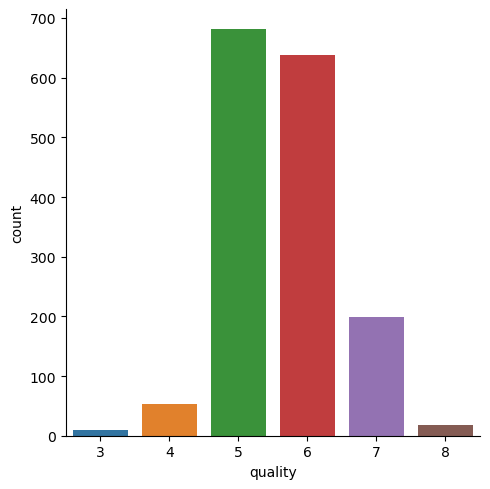

In [7]:
sns.catplot(x='quality',data=wine_data, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

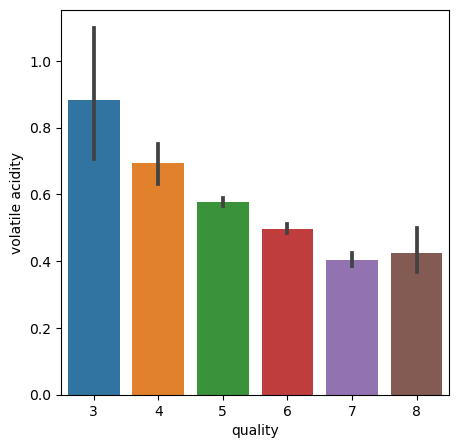

In [8]:
#volatile acidity v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='volatile acidity' , data= wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

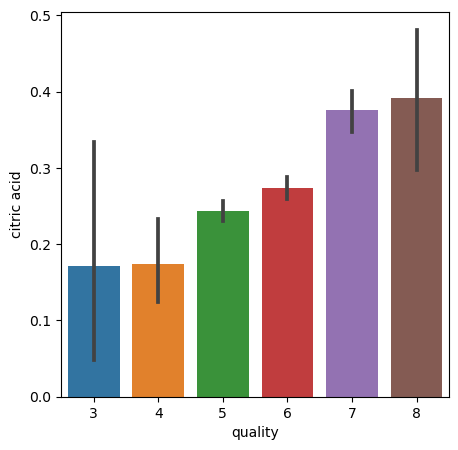

In [9]:
#citric acid v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='citric acid' , data= wine_data)

<Axes: xlabel='quality', ylabel='residual sugar'>

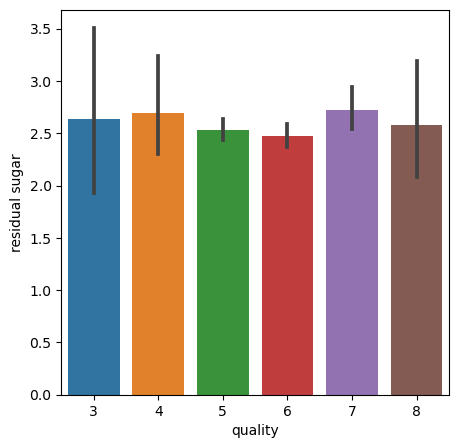

In [10]:
# residual sugar  v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='residual sugar' , data= wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

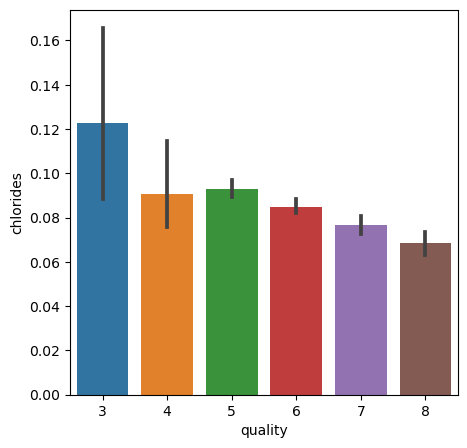

In [11]:
# chloridesv/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='chlorides' , data= wine_data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

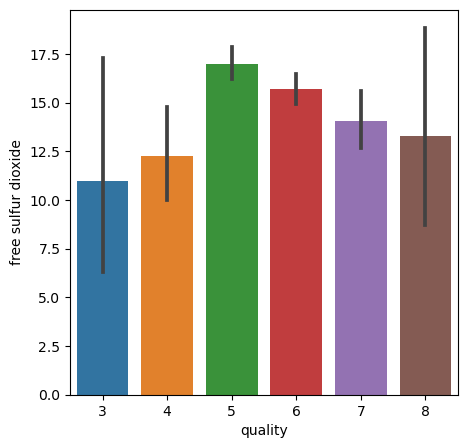

In [12]:
# free sulphur dioxidev/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='free sulfur dioxide' , data= wine_data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

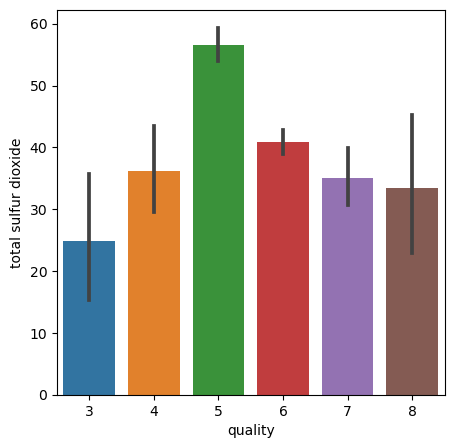

In [13]:
# total sulphurdioxide v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='total sulfur dioxide' , data= wine_data)

<Axes: xlabel='quality', ylabel='density'>

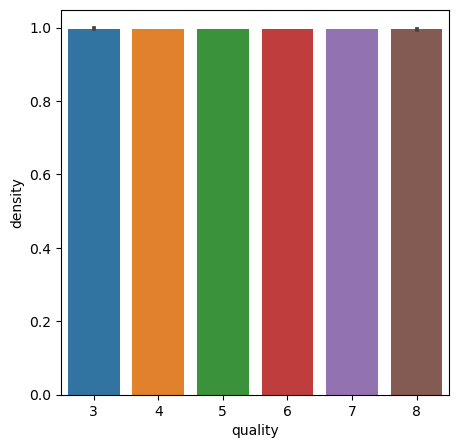

In [14]:
# density v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='density' , data= wine_data)

<Axes: xlabel='quality', ylabel='pH'>

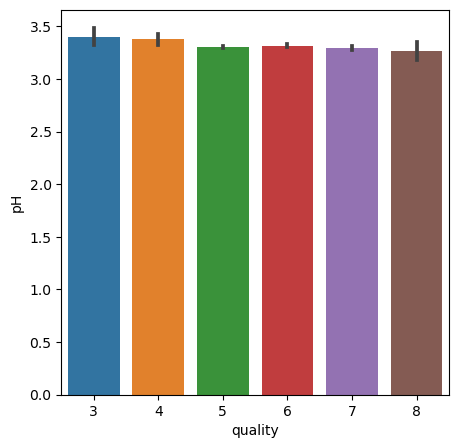

In [15]:
# pH v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='pH' , data= wine_data)

<Axes: xlabel='quality', ylabel='sulphates'>

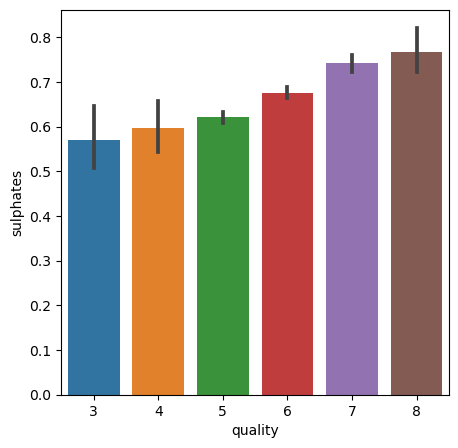

In [16]:
# sulphate v/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='sulphates' , data= wine_data)

<Axes: xlabel='quality', ylabel='alcohol'>

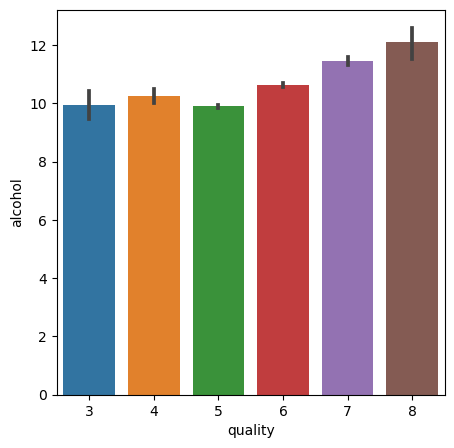

In [17]:
# alcoholv/s quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='alcohol' , data= wine_data)

correlation

 1. positive 
 2. negative
 

In [18]:
correlation = wine_data.corr()

<Axes: >

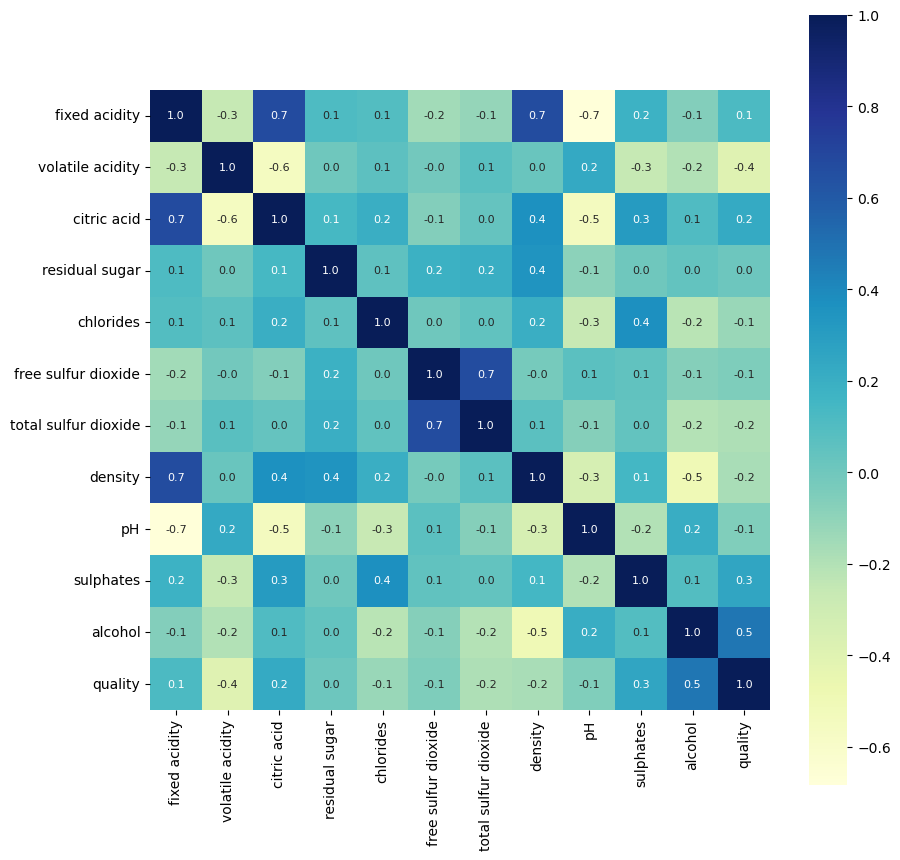

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True ,fmt=".1f",annot=True ,annot_kws={"size":8},cmap="YlGnBu")

DATA PREPROCESSING 

In [20]:
# separete the data lable
X= wine_data.drop('quality',axis=1)

In [21]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

LABEL BINARIZATION 

In [22]:
Y = wine_data['quality'].apply(lambda y_value: 1if y_value>=7 else 0)

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


train &test split

In [24]:
X_train,X_test,Y_train ,Y_test=tts(X,Y,test_size=0.2,random_state=2)

In [25]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


modal training

1. linear regression
2. random forest classifier 


In [35]:
from sklearn.linear_model import LinearRegression as lrg
#model = lrg()
model = rfc()

In [36]:
model.fit(X_train, Y_train)

RandomForestClassifier()

MODEL EVALUATION

ACCURACY SCORE

In [37]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = (X_test_prediction,Y_test)

In [38]:
print(" Accracy : ", test_data_accuracy)

 Accracy :  (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1

BUILDING a PREDICTIVE SYSTEM

In [39]:
input_data = (5.0,0.45,0.50,6.0,0.09800000000000001,8.7,35.5,0.90908,5.36,0.81,2.0)

# changing into array to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the data as we are predicting the data for only one instance 
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print (prediction)

if (prediction[0]==1):
    print('Good quality wine')
else:
    print('bad quality wine')

[0]
bad quality wine


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
